## File computing the parameters of the probability functions characterizing the thermogenesis

In [51]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [52]:
# Definition of exponential function
def exp(x, a, b):
    return a*np.exp(b*x)

### Function defining the bee's thermogenesis activation probability depending on "proba_deactivate"

Area 0.36371666395065144


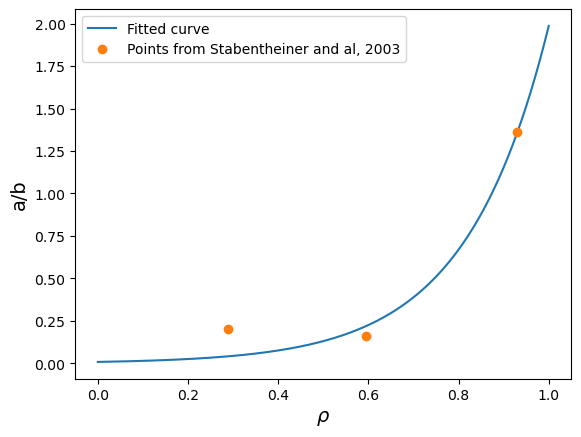

In [53]:
"""
Temp_mean and y_activate : Data from Stabentheiner et al, 2003
Tamb : Approximated by the chill coma temperature Tchill defined in Sumpter et al, 2000 because Tamb used in Stabentheiner et al, 2003 is lower than Tchill. 
Tmax : Approximated by the mean abdomen temperature of bees located inside the core layer plus 1.5 degrees. 
       1.5 degrees represents half of the 3 degrees bandwith considered in Stabentheiner et al, 2003 for the core layer.
x_activate : Temperature ratio laying between 0 and 1.
"""

Tamb = 9
Tmax = 29+1.5
# Mean temperature inside the outermost, intermediate and core layers
Temp_mean = np.array([15.2, 21.8, 29])
x_activate = (Temp_mean - Tamb)/(Tmax - Tamb)

#Active/passive bees ratio
y_activate = np.array([4/20, 7/43, 15/11])

# Fit an exponential function to the data
param_activate, cov = curve_fit(exp, x_activate, y_activate)

# Plot the data and the fitted curve
x = np.linspace(0, 1, 1000)
exp_activate = exp(x, param_activate[0], param_activate[1])

plt.figure()
plt.plot(x, exp_activate, label='Fitted curve')
plt.plot(x_activate, y_activate, 'o', label='Points from Stabentheiner and al, 2003')
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel('a/b', fontsize=14)
plt.legend()

print('Area', np.trapz(exp_activate, x))

Area 0.036371707492390604
Final parameters of the activation probability function for proba_deactivate = 0.1 :  [8.64380980e-04 5.43714608e+00]


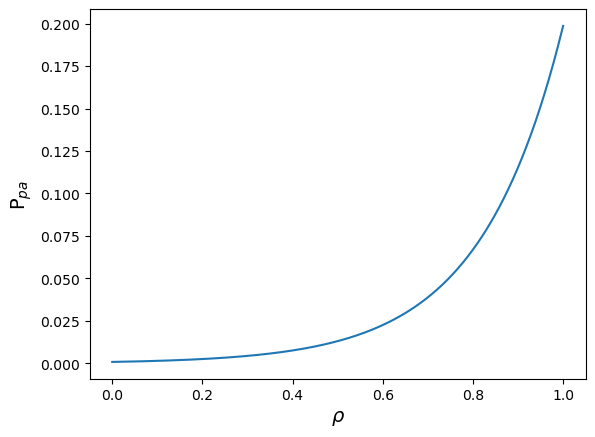

In [54]:
"""Multiply these values with the deactivatition probability to compute the parameters of the final activation function."""

proba_deactivate = 0.1
Pab = y_activate*proba_deactivate

# Fit an exponential function to the data
param_Pab, cov = curve_fit(exp, x_activate, Pab)

# Plot the data and the fitted curve
x = np.linspace(0, 1, 1000)
exp_Pab = exp(x, param_Pab[0], param_Pab[1])

plt.figure()
plt.plot(x, exp_Pab, label='Fitted curve')
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'P$_{pa}$', fontsize=14)

print('Area', np.trapz(exp_Pab, x))
print('Final parameters of the activation probability function for proba_deactivate =', proba_deactivate, ": ", param_Pab)

### PDF characterizing the bee's thermogenesis temperature

##### Plot of the data contained in Stabentheiner et al, 2003 and their corresponding fitted curves

Text(0.5, 1.0, 'Core bee layer')

<Figure size 640x480 with 0 Axes>

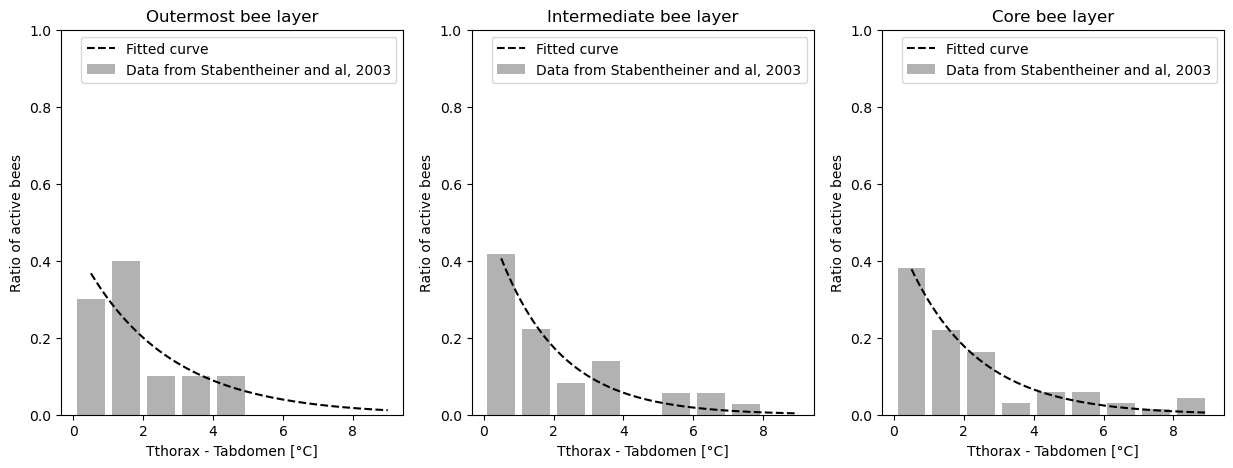

In [55]:
temp = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])

# Outermost bee layer
y_out_ = np.array([3, 4, 1, 1, 1, 0, 0, 0, 0])
y_out = y_out_/np.sum(y_out_)
param_out, cov = curve_fit(exp, temp, y_out)

# Intermediate bee layer
y_int_ = np.array([15, 8, 3, 5, 0, 2, 2, 1, 0])
y_int = y_int_/np.sum(y_int_)
param_int, cov = curve_fit(exp, temp, y_int)

# Core bee layer
y_cor_ = np.array([26, 15, 11, 2, 4, 4, 2, 1, 3])
y_cor = y_cor_/np.sum(y_cor_)
param_cor, cov = curve_fit(exp, temp, y_cor)


# Subplots of the data and their corresponding fitted curves
x = np.linspace(0.5, 9, 10000)
exp_out = exp(x, param_out[0], param_out[1])
exp_int = exp(x, param_int[0], param_int[1])
exp_cor = exp(x, param_cor[0], param_cor[1])

plt.figure()
fig, ax = plt.subplots(1,3, figsize=(15, 5))

ax[0].plot(x, exp_out, label='Fitted curve', color='black', linestyle='--')
ax[0].bar(temp, y_out, label='Data from Stabentheiner and al, 2003', color= (0.5, 0.5, 0.5, 0.6))
ax[0].set_xlabel('Tthorax - Tabdomen [°C]')
ax[0].set_ylabel('Ratio of active bees')
ax[0].legend()
ax[0].set_ylim(0, 1)
ax[0].set_title('Outermost bee layer')

ax[1].plot(x, exp_int, label='Fitted curve', color='black', linestyle='--')
ax[1].bar(temp, y_int, label='Data from Stabentheiner and al, 2003', color= (0.5, 0.5, 0.5, 0.6))
ax[1].set_xlabel('Tthorax - Tabdomen [°C]')
ax[1].set_ylabel('Ratio of active bees')
ax[1].legend()
ax[1].set_ylim(0, 1)
ax[1].set_title('Intermediate bee layer')

ax[2].plot(x, exp_cor, label='Fitted curve', color='black', linestyle='--')
ax[2].bar(temp, y_cor, label='Data from Stabentheiner and al, 2003', color= (0.5, 0.5, 0.5, 0.6))
ax[2].set_xlabel('Tthorax - Tabdomen [°C]')
ax[2].set_ylabel('Ratio of active bees')
ax[2].legend()
ax[2].set_ylim(0, 1)
ax[2].set_title('Core bee layer')


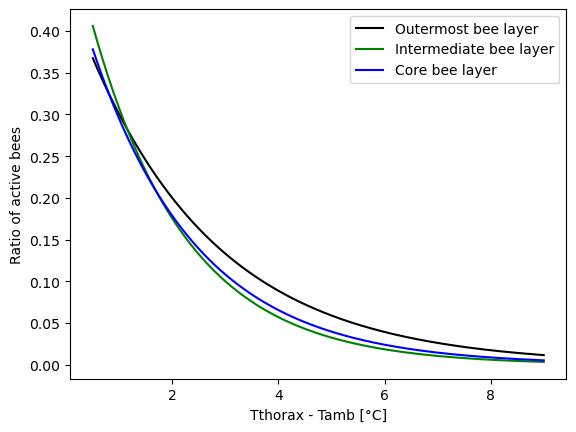

In [56]:
plt.figure()
plt.xlabel('Tthorax - Tamb [°C]')
plt.ylabel('Ratio of active bees')
plt.plot(x, exp_out, label='Outermost bee layer', color='black')
plt.plot(x, exp_int, label='Intermediate bee layer', color='green')
plt.plot(x, exp_cor, label='Core bee layer', color='blue')
plt.legend()

##### Convert each function into a PDF (area = 1)

In [57]:
Area_out = np.trapz(exp_out, x)
exp_out_norm = exp_out/Area_out

Area_int = np.trapz(exp_int, x)
exp_int_norm = exp_int/Area_int

Area_cor = np.trapz(exp_cor, x)
exp_cor_norm = exp_cor/Area_cor

print('Area under the outermost bee layer curve', np.trapz(exp_out_norm, x))
print('Area under the intermediate bee layer curve', np.trapz(exp_int_norm, x))
print('Area under the core bee layer curve', np.trapz(exp_cor_norm, x))

Area under the outermost bee layer curve 1.0
Area under the intermediate bee layer curve 1.0
Area under the core bee layer curve 0.9999999999999999


##### Calculation of the area difference between the curves

In [58]:
diff_out_int = np.trapz(abs(exp_out_norm - exp_int_norm), x)
diff_out_cor = np.trapz(abs(exp_out_norm - exp_cor_norm), x)
diff_int_cor = np.trapz(abs(exp_int_norm - exp_cor_norm), x)

print('Area difference between outermost and intermediate bee layers', diff_out_int)
print('Area difference between outermost and core bee layers', diff_out_cor)
print('Area difference between intermediate and core bee layers', diff_int_cor)

Area difference between outermost and intermediate bee layers 0.211373238522406
Area difference between outermost and core bee layers 0.1347144343339588
Area difference between intermediate and core bee layers 0.07704685778796636


Since the maxiumum area difference is equal to 2, we consider that a difference of 0.21 is small enough to be neglected. Therefore, a single curve corresponding to the mean of the three others will be considered to characterize the bees' thermogenesis temperature for every layers.

##### Computation and plot of the mean function characterizing the three layers

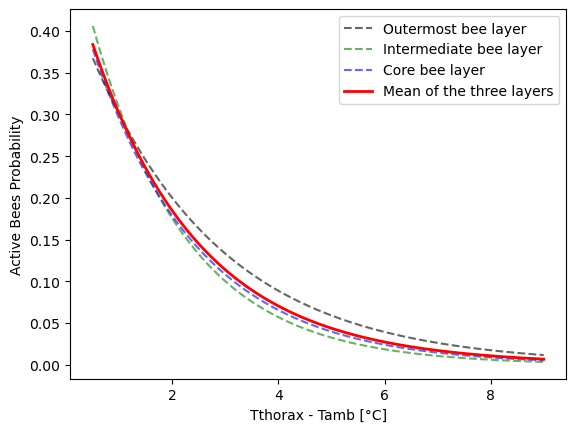

In [59]:
exp_mean = (exp_out + exp_int + exp_cor)/3

plt.figure()
plt.xlabel('Tthorax - Tamb [°C]')
plt.ylabel('Active Bees Probability')
plt.plot(x, exp_out, label='Outermost bee layer', color='black', linestyle='--',    alpha=0.6)
plt.plot(x, exp_int, label='Intermediate bee layer', color='green', linestyle='--', alpha=0.6)
plt.plot(x, exp_cor, label='Core bee layer', color='blue', linestyle='--', alpha=0.6)
plt.plot(x, exp_mean, label='Mean of the three layers', color='red', linewidth=2)
plt.legend()

##### Normalization of the mean function

Parameters of the normalized mean function [ 0.62456025 -0.48346942]
Area of the normalized mean function:  0.9977751236778689


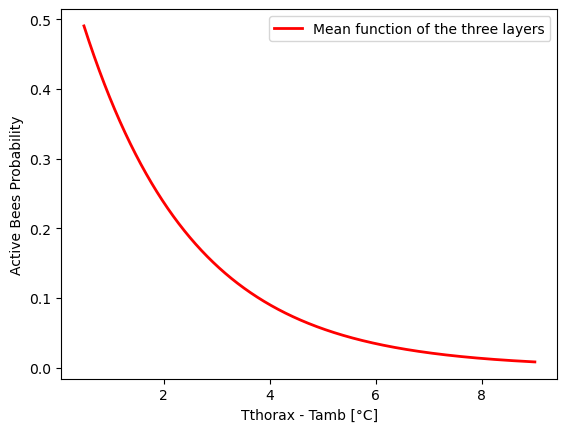

In [60]:
# Obtain an area of one under the mean curve
area_mean = np.trapz(exp_mean, x)
exp_norm = exp_mean/area_mean

# Compute the final parameters for the probability function
param_norm, cov = curve_fit(exp, x, exp_norm)

#Plot the final probability function
exp_final = exp(x, param_norm[0], param_norm[1])

plt.figure()
plt.xlabel('Tthorax - Tamb [°C]')
plt.ylabel('Active Bees Probability')
plt.plot(x, exp_final, label='Mean function of the three layers', color='red', linewidth=2)
plt.legend()

print('Parameters of the normalized mean function', param_norm)
print('Area of the normalized mean function: ', np.trapz(exp_final, x))

### OLD Computation of a PDF defining the bee's thermogenesis activation probability (area = 1)

NOT USED ANYMORE

[2.88372093 5.95348837 9.30232558]
Area 3.6371756260549377


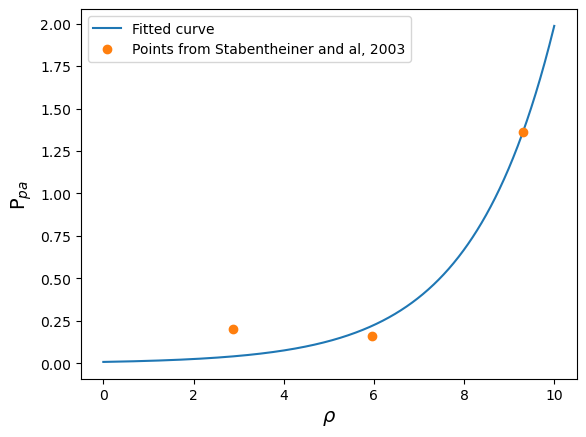

In [61]:
"""
Temp_mean and y_activate : Data from Stabentheiner et al, 2003
Tamb : Approximated by the chill coma temperature Tchill defined in Sumpter et al, 2000 because Tamb used in Stabentheiner et al, 2003 is lower than Tchill. 
Tmax : Approximated by the mean abdomen temperature of bees located inside the core layer plus 1.5 degrees. 
       1.5 degrees represents half of the 3 degrees bandwith considered in Stabentheiner et al, 2003 for the core layer.
x_activate: Ranges between 0 and 10 to obtain a probability function always laying between 0 and 1.
"""

Tamb = 9
Tmax = 29+1.5
Temp_mean = np.array([15.2, 21.8, 29])
x_activate = 10*(Temp_mean - Tamb)/(Tmax - Tamb)
print(x_activate)

#Active/passive bees ratio
y_activate = np.array([4/20, 7/43, 15/11])

# Fit an exponential function to the data
param_activate, cov = curve_fit(exp, x_activate, y_activate)

# Plot the data and the fitted curve
x = np.linspace(0, 10, 1000)
exp_activate = exp(x, param_activate[0], param_activate[1])

plt.figure()
plt.plot(x, exp_activate, label='Fitted curve')
plt.plot(x_activate, y_activate, 'o', label='Points from Stabentheiner and al, 2003')
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'P$_{pa}$', fontsize=14)
plt.legend()

print('Area', np.trapz(exp_activate, x))

Area 1.0000000000000002
Parameters of the activation probability function [0.00237655 0.54371327]


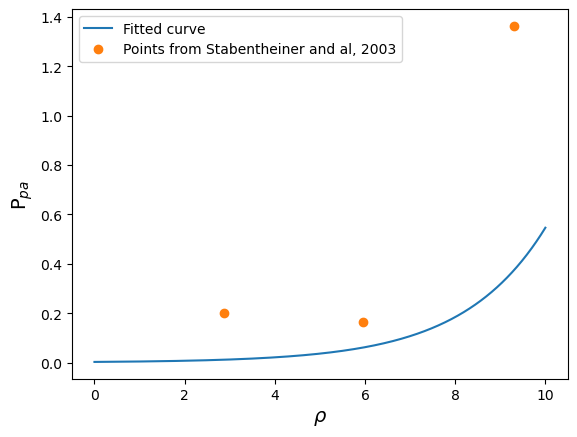

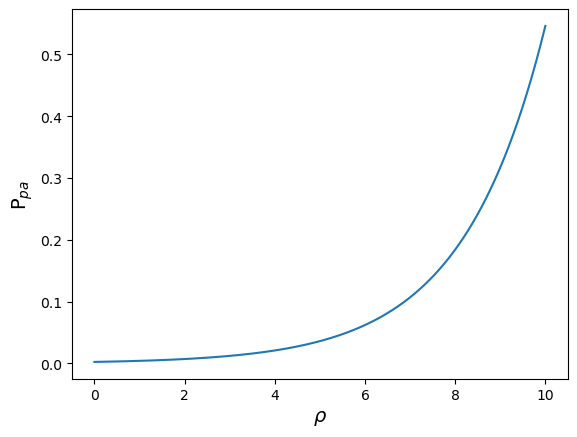

In [62]:
# Shift the function to obtain an area equal to 1
area_activate = np.trapz(exp_activate, x)
exp_act_norm = exp_activate/area_activate   

#Plot of the fitted curve with the data points
plt.figure()
plt.plot(x, exp_act_norm, label='Fitted curve')
plt.plot(x_activate, y_activate, 'o', label='Points from Stabentheiner and al, 2003')
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'P$_{pa}$', fontsize=14)
plt.legend()

#Plot of the fitted curve without the data points
plt.figure()
plt.plot(x, exp_act_norm, label='Fitted curve')
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'P$_{pa}$', fontsize=14)

print('Area', np.trapz(exp_act_norm, x))

# Computation of the final parameters of the activation probability function
param_final, cov = curve_fit(exp, x, exp_act_norm)
print('Parameters of the activation probability function', param_final)